#### 从 text 文件中提炼中每次的政策

In [16]:
import sys
import pandas as pd
import numpy as np
import os
# Get the last folder in the specified root directory
results_root = "..\\outputs\\5 states\\6 weeks\\gpt-4.1-mini"
last_folder = sorted([f for f in os.listdir(results_root) if os.path.isdir(os.path.join(results_root, f))])[0]
print("Last folder:", last_folder)
agent_folder = os.path.join(results_root, last_folder)
log_file = "mississippi.log"
log_path = os.path.join(agent_folder, log_file)

Last folder: gpt-4.1-mini_2025-12-19-22-04-40


In [17]:
import re
import ast
import json
import sys
from pathlib import Path
def extract_policy_responses(log_path: str):
    log_path = Path(log_path)
    if not log_path.is_file():
        raise FileNotFoundError(f"Log file not found: {log_path}")
    # 匹配整行的 Parsed PolicyResponse 段
    line_pattern = re.compile(r"Parsed PolicyResponse:\s*(.*)")
    results = []
    with log_path.open("r", encoding="utf-8",errors="ignore") as f:
        for line in f:
            line = line.rstrip("\n")
            m = line_pattern.search(line)
            if not m:
                continue
            # 拿到 'policy=... explanation=...' 这一整段
            payload = m.group(1).strip()
            # 再用一个正则，把 policy 和 explanation 拆开
            # 注意这里 policy 用贪婪匹配，到最后一个 " explanation=" 为止
            m2 = re.match(r"policy=(\{.*\})\s+explanation=(.*)", payload)
            if not m2:
                # 如果格式跟预期不符，可以打印出来调试
                print(f"[WARN] Cannot parse payload: {payload}", file=sys.stderr)
                continue
            policy_str = m2.group(1)
            explanation_str = m2.group(2)
            # 组装成一个完整的 Python 字面量，再用 ast.literal_eval 解析
            dict_source = "{'policy': " + policy_str + ", 'explanation': " + explanation_str + "}"
            try:
                obj = ast.literal_eval(dict_source)
                results.append(obj)
            except Exception as e:
                print(f"[ERROR] Failed to eval: {e}", file=sys.stderr)
                print(f"         source: {dict_source[:200]}...", file=sys.stderr)

    return results

In [18]:
responses = extract_policy_responses(log_path)
num_decision = len(responses)
print(f"Total policy decisions extracted: {num_decision}")
for i in responses:
    print(i)

Total policy decisions extracted: 6
{'policy': {'arizona': [0.2, 0.18, 0.16, 0.15, 0.16, 0.15], 'new mexico': [0.22, 0.2, 0.18, 0.15, 0.13, 0.12], 'texas': [0.12, 0.12, 0.16, 0.18, 0.21, 0.21], 'virginia': [0.18, 0.17, 0.16, 0.16, 0.16, 0.17]}, 'explanation': "The overall strategy balances epidemic risk and mobility by tailoring traffic allocation patterns to each origin's infection prevalence and inflow. States with moderate to high infection prevalence relative to population (Arizona, New Mexico, Virginia) have stricter control in early weeks to minimize initial imported infections, reducing seeding risk in Mississippi. Texas, with low prevalence but very high inflow, uses relaxed controls early to minimize economic disruption while gradually increasing restrictions. This staggered and diverse approach reduces cumulative imported infections and deaths by front-loading restrictions where risk is higher and smoothing or relaxing where risk is lower. The total inbound flow from each sta

In [8]:
keys = responses[0]['policy'].keys()
keys

dict_keys(['arizona', 'new mexico', 'texas', 'virginia'])

Processing folder: gpt-4.1-mini_2025-12-19-22-04-40
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-04-40\arizona.log
Processing folder: gpt-4.1-mini_2025-12-19-22-13-10
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-13-10\arizona.log
Processing folder: gpt-4.1-mini_2025-12-19-22-22-52
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-22-52\arizona.log
{'mississippi': {'strict_first': 4, 'relaxed_first': 9, 'balanced': 5}, 'new mexico': {'strict_first': 7, 'relaxed_first': 4, 'balanced': 7}, 'texas': {'strict_first': 5, 'relaxed_first': 6, 'balanced': 7}, 'virginia': {'strict_first': 2, 'relaxed_first': 8, 'balanced': 8}}


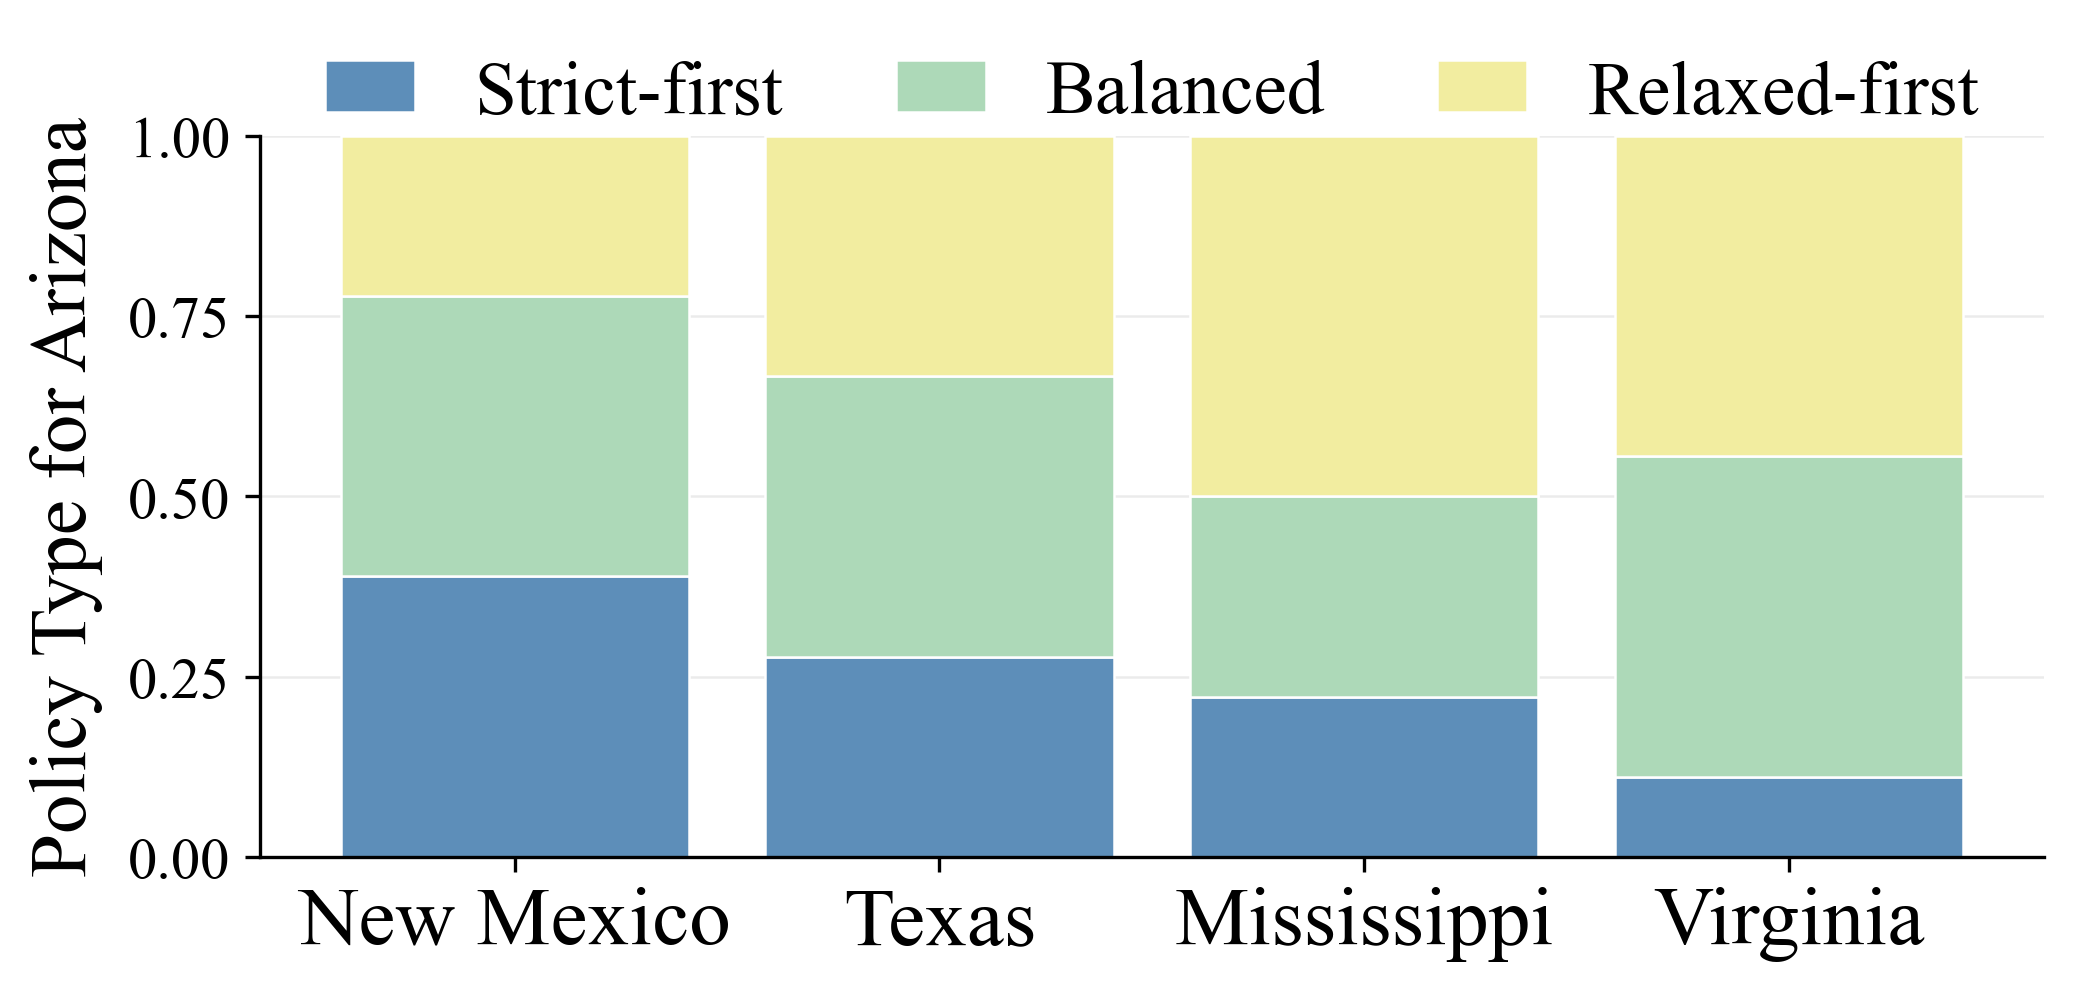

Processing folder: gpt-4.1-mini_2025-12-19-22-04-40
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-04-40\mississippi.log
Processing folder: gpt-4.1-mini_2025-12-19-22-13-10
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-13-10\mississippi.log
Processing folder: gpt-4.1-mini_2025-12-19-22-22-52
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-22-52\mississippi.log
{'arizona': {'strict_first': 1, 'relaxed_first': 5, 'balanced': 12}, 'new mexico': {'strict_first': 3, 'relaxed_first': 8, 'balanced': 7}, 'texas': {'strict_first': 14, 'relaxed_first': 1, 'balanced': 3}, 'virginia': {'strict_first': 3, 'relaxed_first': 4, 'balanced': 11}}


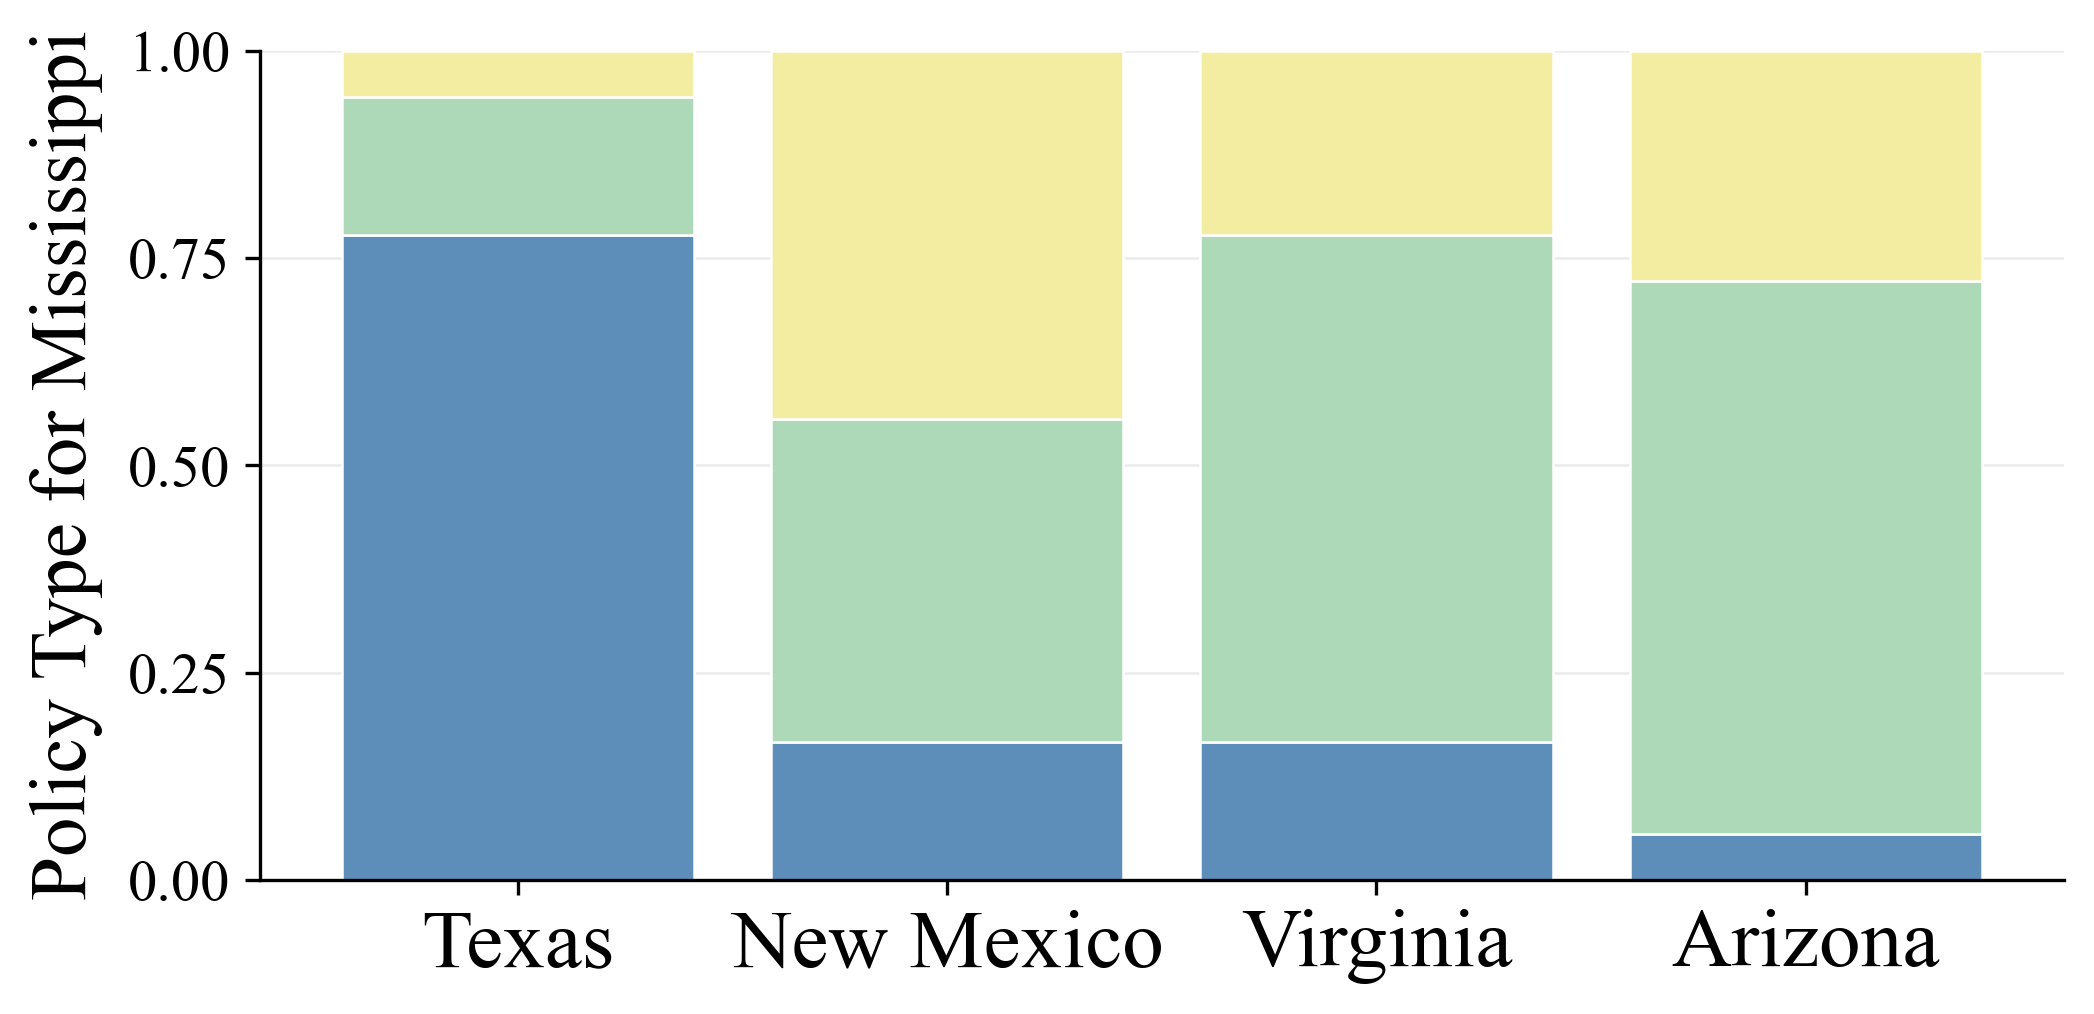

Processing folder: gpt-4.1-mini_2025-12-19-22-04-40
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-04-40\new mexico.log
Processing folder: gpt-4.1-mini_2025-12-19-22-13-10
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-13-10\new mexico.log
Processing folder: gpt-4.1-mini_2025-12-19-22-22-52
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-22-52\new mexico.log
{'arizona': {'strict_first': 3, 'relaxed_first': 6, 'balanced': 9}, 'mississippi': {'strict_first': 7, 'relaxed_first': 6, 'balanced': 5}, 'texas': {'strict_first': 7, 'relaxed_first': 4, 'balanced': 7}, 'virginia': {'strict_first': 6, 'relaxed_first': 7, 'balanced': 5}}


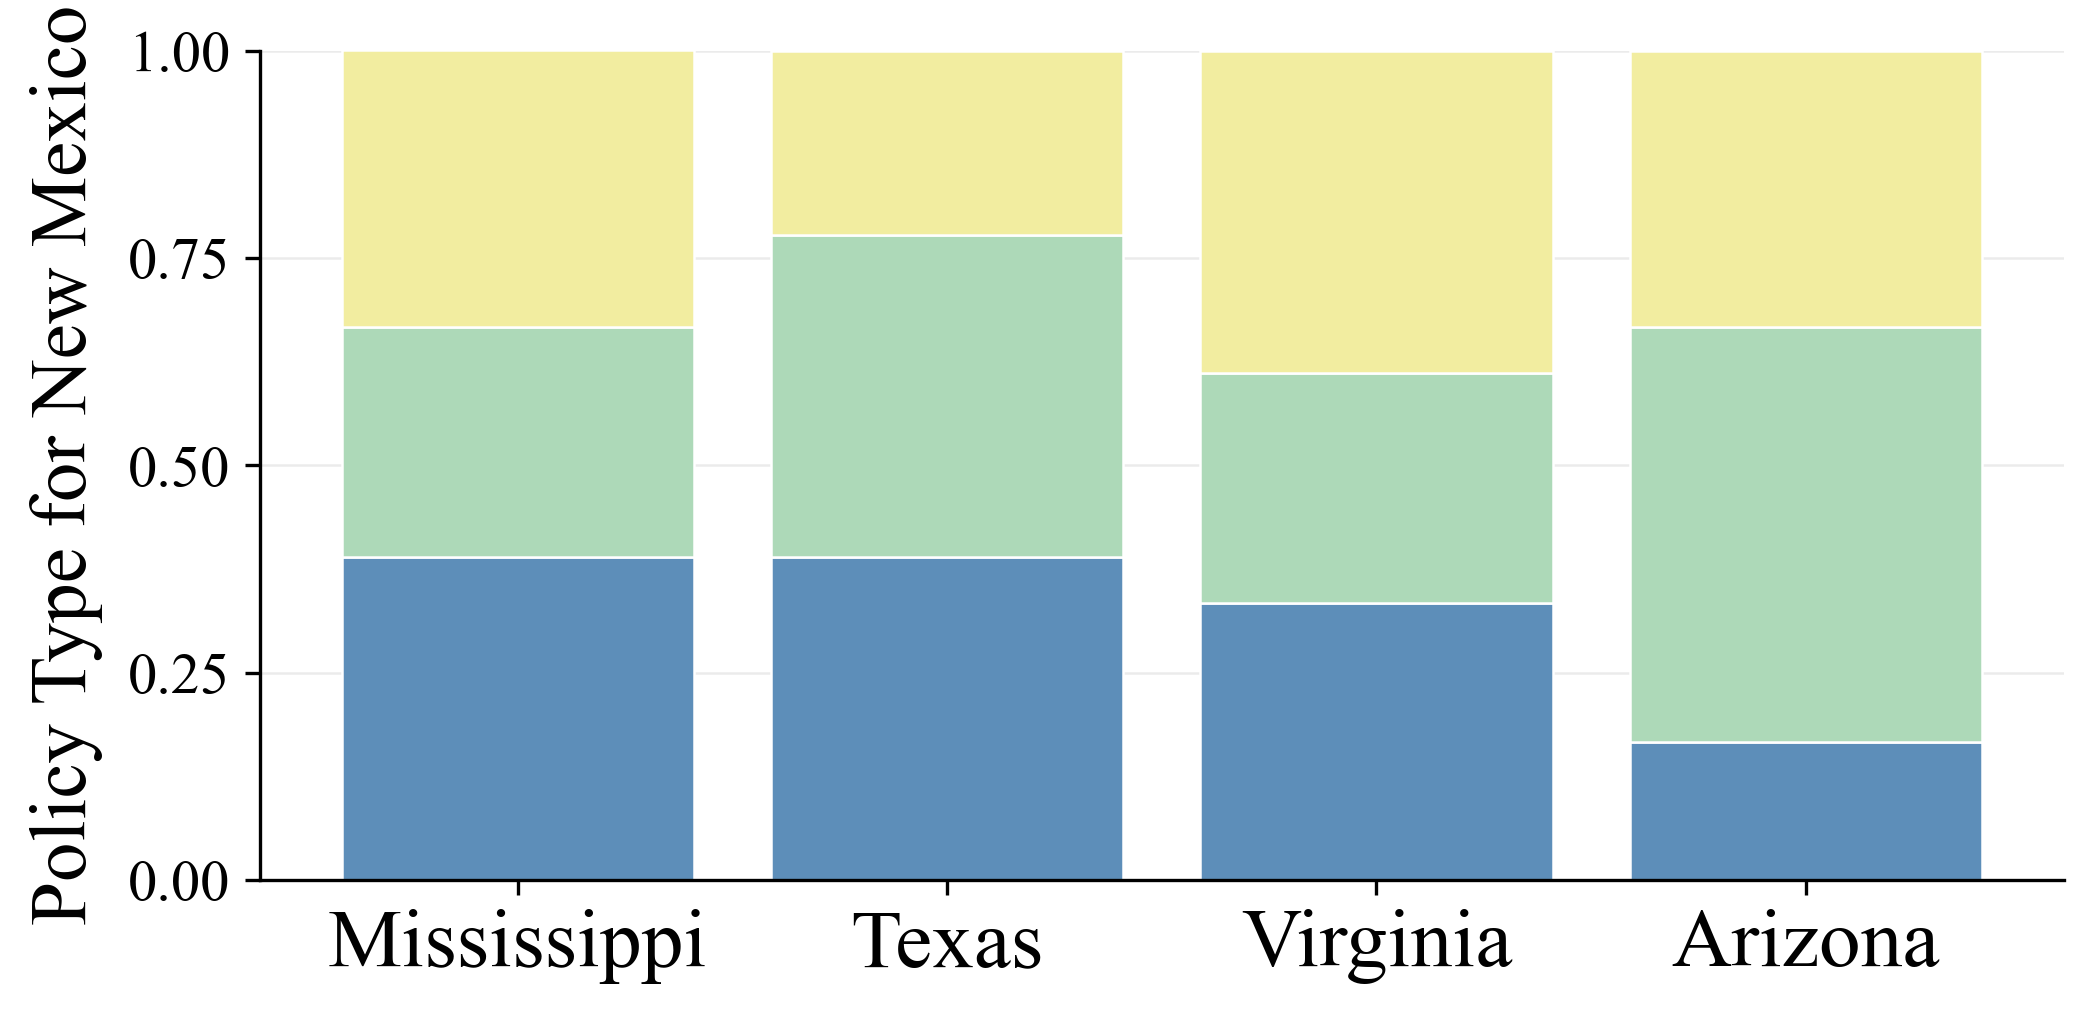

Processing folder: gpt-4.1-mini_2025-12-19-22-04-40
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-04-40\texas.log
Processing folder: gpt-4.1-mini_2025-12-19-22-13-10
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-13-10\texas.log
Processing folder: gpt-4.1-mini_2025-12-19-22-22-52
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-22-52\texas.log
{'arizona': {'strict_first': 0, 'relaxed_first': 10, 'balanced': 8}, 'mississippi': {'strict_first': 5, 'relaxed_first': 10, 'balanced': 3}, 'new mexico': {'strict_first': 3, 'relaxed_first': 3, 'balanced': 12}, 'virginia': {'strict_first': 5, 'relaxed_first': 7, 'balanced': 6}}


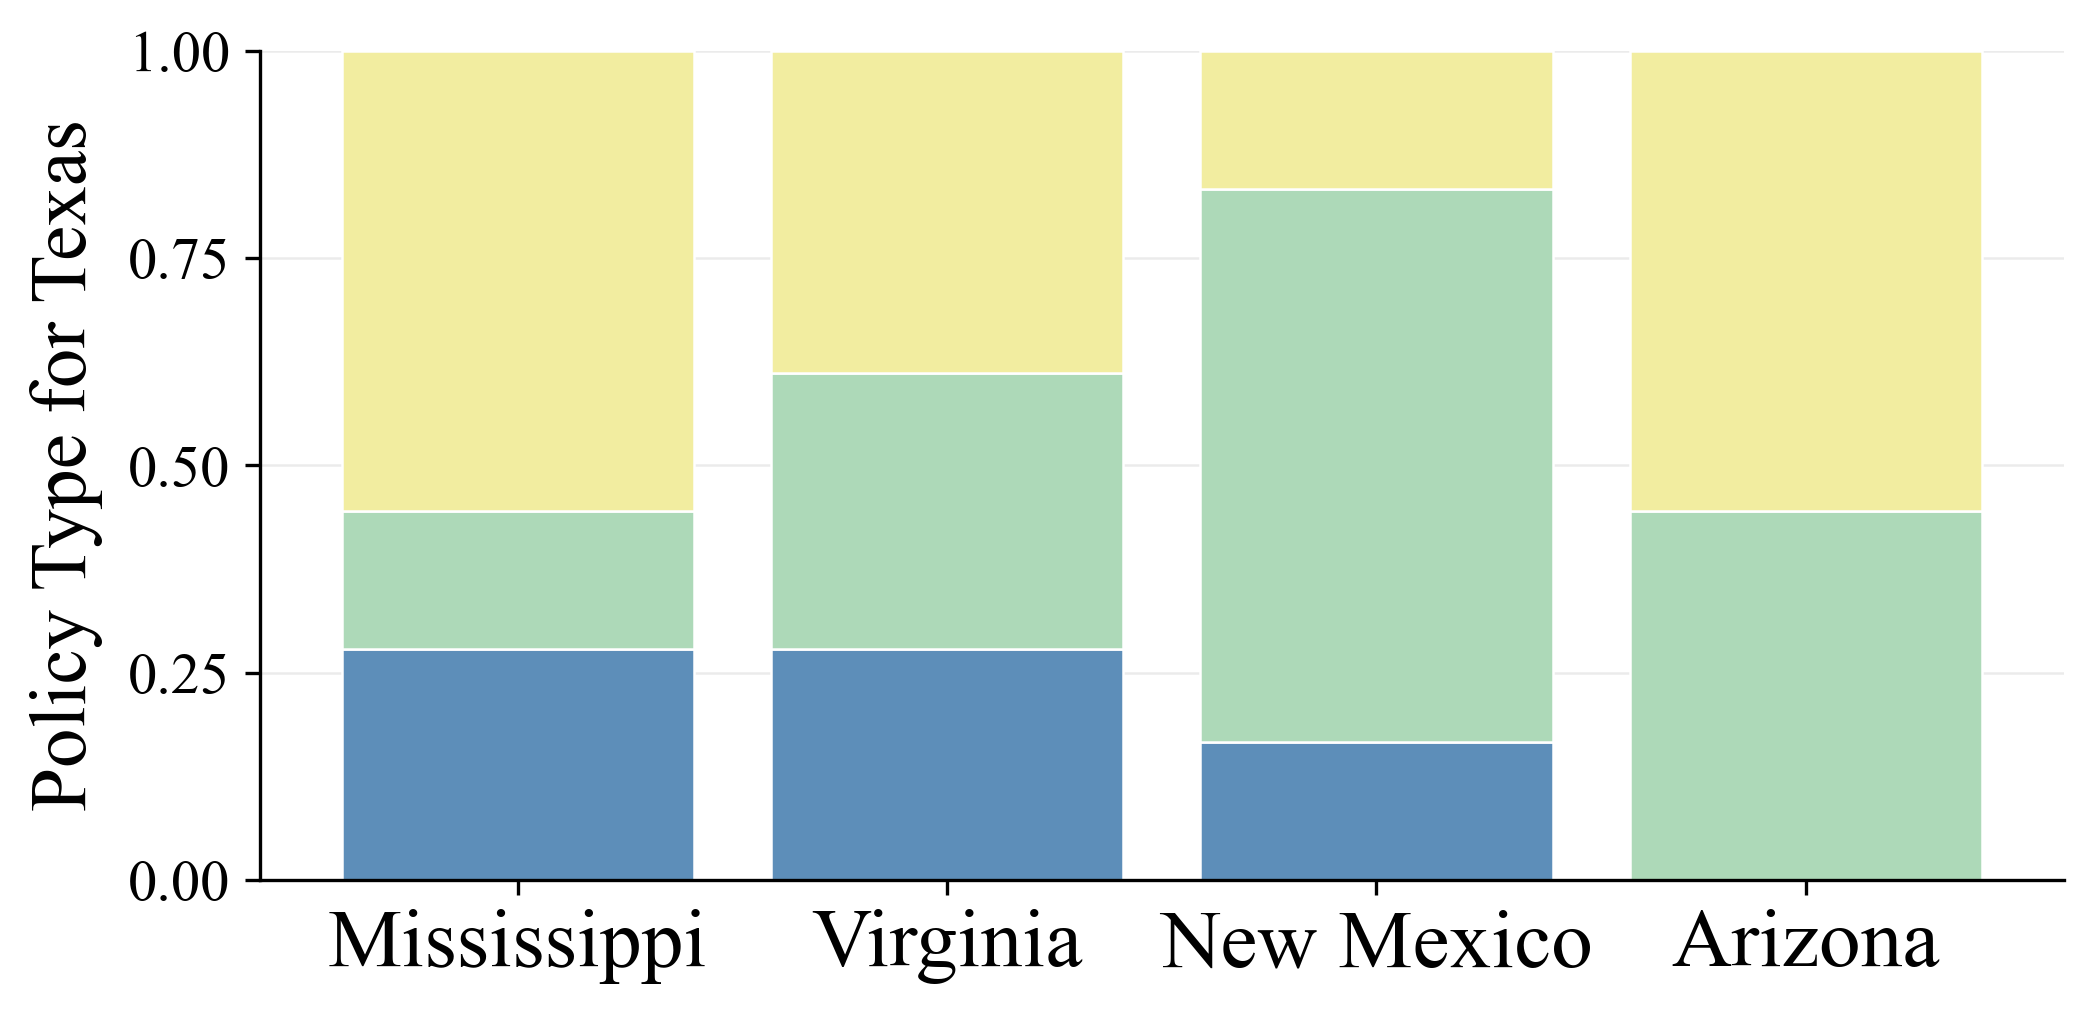

Processing folder: gpt-4.1-mini_2025-12-19-22-04-40
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-04-40\virginia.log
Processing folder: gpt-4.1-mini_2025-12-19-22-13-10
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-13-10\virginia.log
Processing folder: gpt-4.1-mini_2025-12-19-22-22-52
Processing log file: ..\outputs\5 states\6 weeks\gpt-4.1-mini\gpt-4.1-mini_2025-12-19-22-22-52\virginia.log
{'arizona': {'strict_first': 3, 'relaxed_first': 4, 'balanced': 11}, 'mississippi': {'strict_first': 9, 'relaxed_first': 5, 'balanced': 4}, 'new mexico': {'strict_first': 3, 'relaxed_first': 1, 'balanced': 14}, 'texas': {'strict_first': 11, 'relaxed_first': 1, 'balanced': 6}}


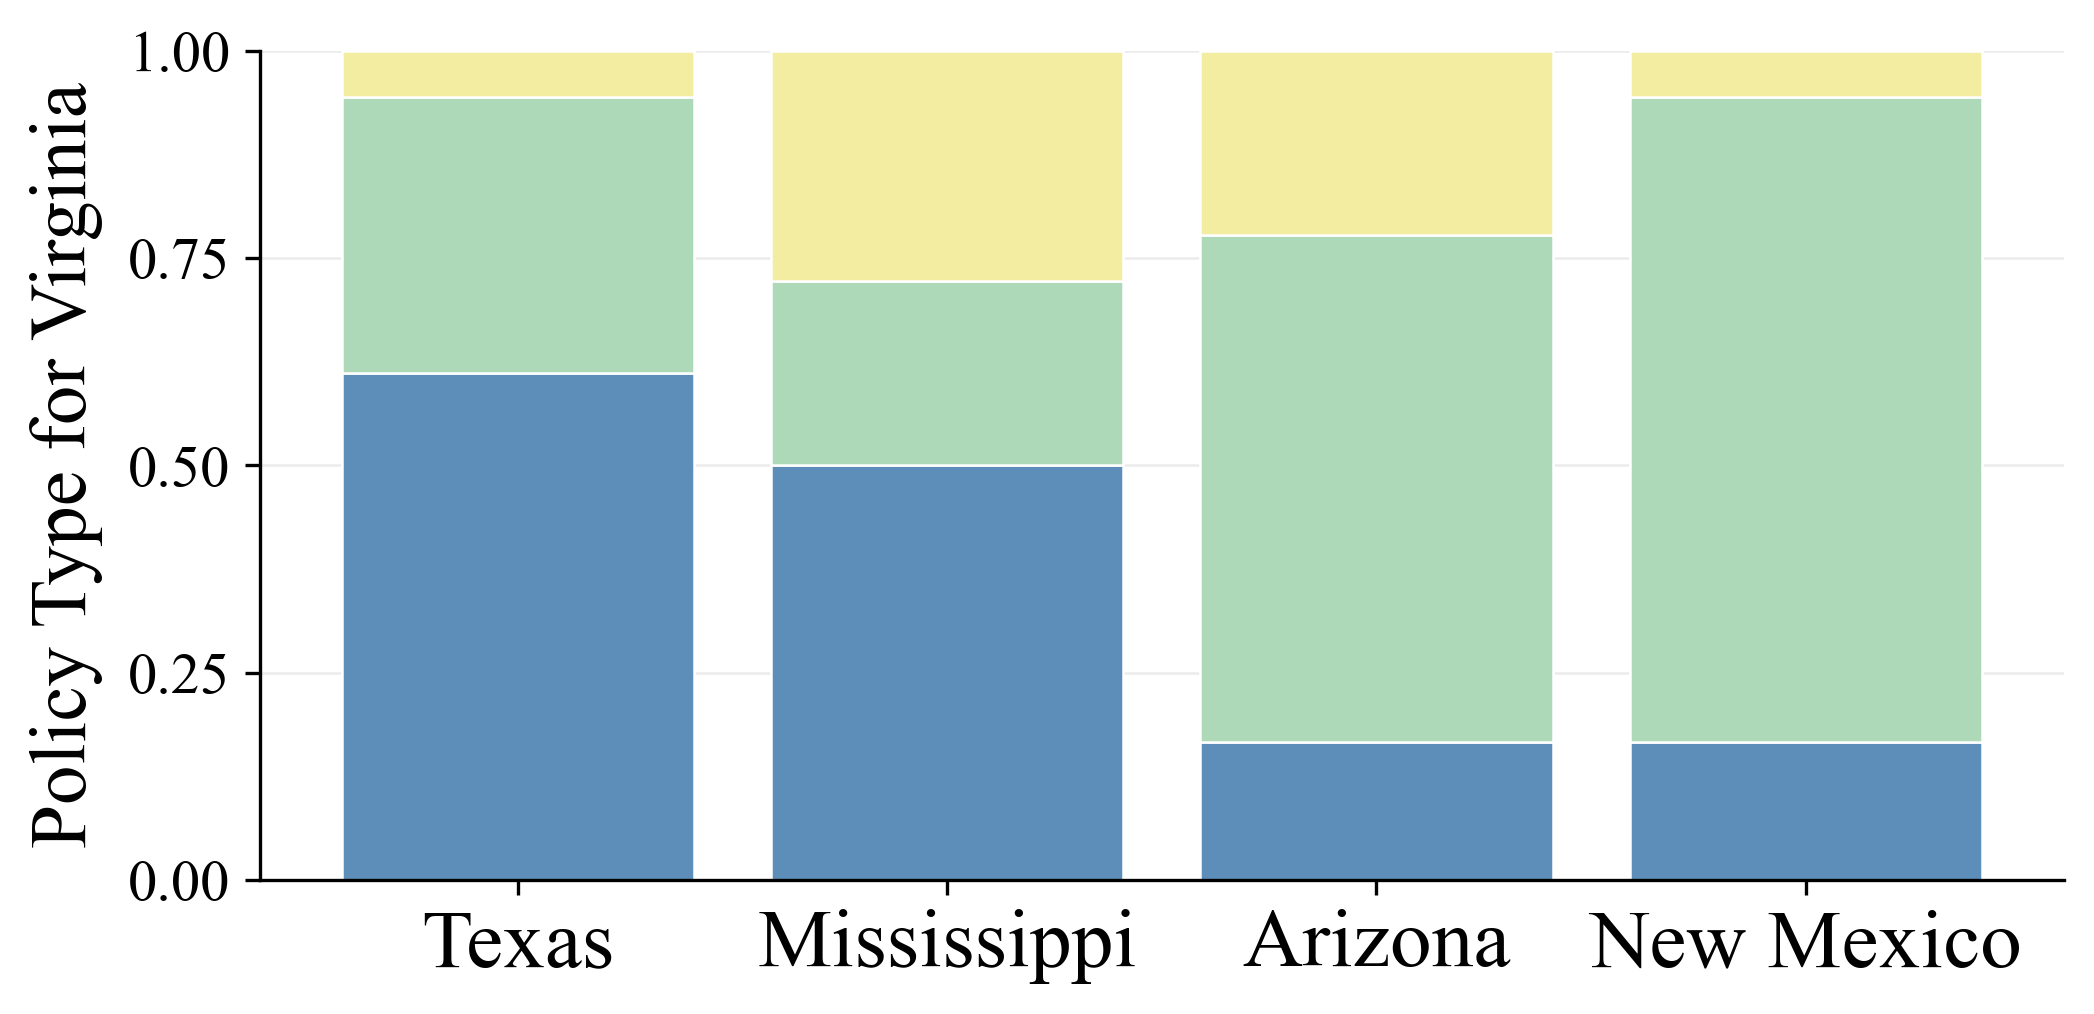

In [64]:
import numpy as np
import matplotlib.pyplot as plt
def aggregate_to_3_periods(eight_weeks):
    if len(eight_weeks) != 6:
        raise ValueError(f"expect 6 weeks, got {len(eight_weeks)}")
    return [
        eight_weeks[0] + eight_weeks[1],
        eight_weeks[2] + eight_weeks[3],
        eight_weeks[4] + eight_weeks[5],
    ]

def plot_policy_responses(responses, states=None, title_prefix="Four-period inbound allocation"):
    if not responses:
        print("No responses to plot.")
        return

    # 所有 policy 的编号，用于图例
    policy_labels = [f"policy_{i+1}" for i in range(len(responses))]

    # 自动识别州名
    if states is None:
        states = list(responses[0]['policy'].keys())

    period_labels = ["Weeks 1–2", "Weeks 3–4", "Weeks 5–6"]
    x = np.arange(len(period_labels))             # 4 个阶段
    width = 0.8 / len(responses)                 # 所有柱子控制在 0.8 宽度内
    for s in states:
        plt.figure(figsize=(8, 4))
        for i, resp in enumerate(responses):
            policy = resp['policy']
            if s not in policy:
                continue
            eight_weeks = policy[s]
            three_periods = aggregate_to_3_periods(eight_weeks)
            shift = (i - (len(responses)-1)/2) * width  # 左右平移
            plt.bar(x + shift, three_periods, width=width, label=policy_labels[i])
        plt.xticks(x, period_labels)
        plt.ylabel("Inbound flow fraction\n(sum of 2 weeks)")
        plt.ylim(0, 0.5)  # 可按需调整
        plt.title(f"{title_prefix} for {s.title()}")
        plt.legend()
        plt.tight_layout()

    plt.show()

states_list = ['arizona', 'mississippi', 'new mexico', 'texas', 'virginia']
for i in range(len(states_list)):
    log_file = f"{states_list[i]}.log"
    states = [ s for s in states_list if s != states_list[i] ]
    type_count = {s: {'strict_first': 0, 'relaxed_first': 0, 'balanced': 0} for s in states}
    folders = [f for f in os.listdir(results_root) if os.path.isdir(os.path.join(results_root, f))]
    for last_folder in folders:
        print("Processing folder:", last_folder)
        agent_folder = os.path.join(results_root, last_folder)
        log_path = os.path.join(agent_folder, log_file)
        print("Processing log file:", log_path)
        responses = extract_policy_responses(log_path)
        for s in states:
            for resp in responses:
                six_weeks = resp['policy'][s]
                three_periods = aggregate_to_3_periods(six_weeks)
                if three_periods[0] <= 0.3 and three_periods[2] >= 0.4:
                    type_count[s]['strict_first'] += 1
                elif three_periods[0] >= 0.4 and three_periods[2] <= 0.3:
                    type_count[s]['relaxed_first'] += 1
                else:
                    type_count[s]['balanced'] += 1
    print(type_count)


    cats = ["strict_first", "balanced", "relaxed_first"]   # 推荐把 balanced 放中间，语义像“基线”
    cat_labels = {
        "strict_first": "Strict-first",
        "balanced": "Balanced",
        "relaxed_first": "Relaxed-first"
    }
    # 组装矩阵
    counts = np.array([[type_count[s][c] for c in cats] for s in states], dtype=float)
    totals = counts.sum(axis=1, keepdims=True)
    props = np.divide(counts, totals, out=np.zeros_like(counts), where=totals>0)
    order = np.argsort(-props[:, 0])
    states = [states[i] for i in order]
    props = props[order, :]
    # --- 画图参数（Nature-like）
    plt.rcParams.update({
        "font.family": "Times New Roman",   # 若你本地有 Arial/Helvetica 可替换
        "font.size": 14,
        "axes.linewidth": 0.8,
        "xtick.major.width": 0.8,
        "ytick.major.width": 0.8,
    })

    fig, ax = plt.subplots(figsize=(7.2, 3.6), dpi=300)  # 单栏/双栏可按版式改

    x = np.arange(len(states))
    bottom = np.zeros(len(states))

    # 颜色：不显式指定也可，但你要求“高端”，建议用灰阶+一处强调色
    # 这里用：深灰(Strict) / 浅灰(Balanced) / 中灰(Relaxed)，保证印刷友好
    colors = {
        "strict_first":  '#5d8eb9',  # Blue
        "balanced":      '#add9b8',  # Orange
        "relaxed_first": '#f2eda0',  # Bluish green
    }

    for j, c in enumerate(cats):
        ax.bar(
            x, props[:, j],
            bottom=bottom,
            width=0.82,
            edgecolor="white",
            linewidth=0.6,
            label=cat_labels[c],
            color=colors[c],
        )
        bottom += props[:, j]

    # 坐标轴与网格（极简）
    ax.set_ylim(0, 1.0)
    ax.set_ylabel(f"Policy Type for {states_list[i].title()}", labelpad=6, fontsize=19)
    ax.set_xticks(x)
    ax.set_xticklabels([s.title() for s in states],fontsize=20)
    ax.yaxis.set_ticks([0, 0.25, 0.50, 0.75, 1.0])
    ax.grid(axis="y", linewidth=0.6, alpha=0.25)
    ax.set_axisbelow(True)
    # 去掉上/右边框（Nature 常见）
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # 图例：上方横排，省空间
    if i == 0:
        leg = ax.legend(
            ncol=3, frameon=False,
            loc="upper center", bbox_to_anchor=(0.5, 1.20),
            handlelength=1.2, columnspacing=1.5, fontsize=18
        )
    #ax.set_title("Policy sequencing types across states", pad=18)
    fig.tight_layout()
    plt.savefig(f"D:/MyDownload/Code/OD-COVID/figures/5 states/mississippi/policy_{log_file[:5]}.png", dpi=300)
    plt.show()


# plot_policy_responses(responses)
# === 使用示例 ===
# responses = extract_policy_responses(log_path)
# plot_policy_responses(responses)


In [50]:
states

['mississippi', 'new mexico', 'texas', 'virginia']

In [22]:
stirct_policies = {}
for i in range(num_decision):
    print(f"Decision {i+1}:")
    for key, value in responses[i]['policy'].items():
        if sum(value[:3])<=0.24:
            stirct_policies[key] = 1
        else:
            stirct_policies[key] = 0
    print(stirct_policies)


Decision 1:
{'arizona': 0, 'arkansas': 1, 'idaho': 1, 'indiana': 1, 'iowa': 0, 'kentucky': 1, 'michigan': 1, 'minnesota': 0, 'mississippi': 1, 'nebraska': 0, 'new mexico': 1, 'ohio': 1, 'oklahoma': 0, 'south carolina': 1, 'tennessee': 1, 'texas': 0, 'utah': 1, 'virginia': 1, 'wisconsin': 0}
Decision 2:
{'arizona': 1, 'arkansas': 0, 'idaho': 0, 'indiana': 0, 'iowa': 0, 'kentucky': 1, 'michigan': 1, 'minnesota': 0, 'mississippi': 1, 'nebraska': 0, 'new mexico': 0, 'ohio': 1, 'oklahoma': 0, 'south carolina': 0, 'tennessee': 1, 'texas': 1, 'utah': 0, 'virginia': 0, 'wisconsin': 0}
Decision 3:
{'arizona': 0, 'arkansas': 0, 'idaho': 0, 'indiana': 0, 'iowa': 0, 'kentucky': 1, 'michigan': 1, 'minnesota': 0, 'mississippi': 1, 'nebraska': 0, 'new mexico': 0, 'ohio': 1, 'oklahoma': 0, 'south carolina': 0, 'tennessee': 1, 'texas': 0, 'utah': 0, 'virginia': 0, 'wisconsin': 0}
Decision 4:
{'arizona': 0, 'arkansas': 0, 'idaho': 0, 'indiana': 0, 'iowa': 0, 'kentucky': 0, 'michigan': 0, 'minnesota': 0,

interpretability
1. info 1: SEIRD model of it self
2. infl 2: current population of itself
3. info 3: Origin population info for each state
4. info 4: baseline mobility info 

T0 do
1. observe the influne of each info on the same state
1. oberserve the interaction of each state